In [23]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os
import imageio
from IPython.display import Image

In [24]:
RAW_DIR = "../data/brats20/BraTS2020_TrainingData/MICCAI_BraTS2020_TrainingData"  

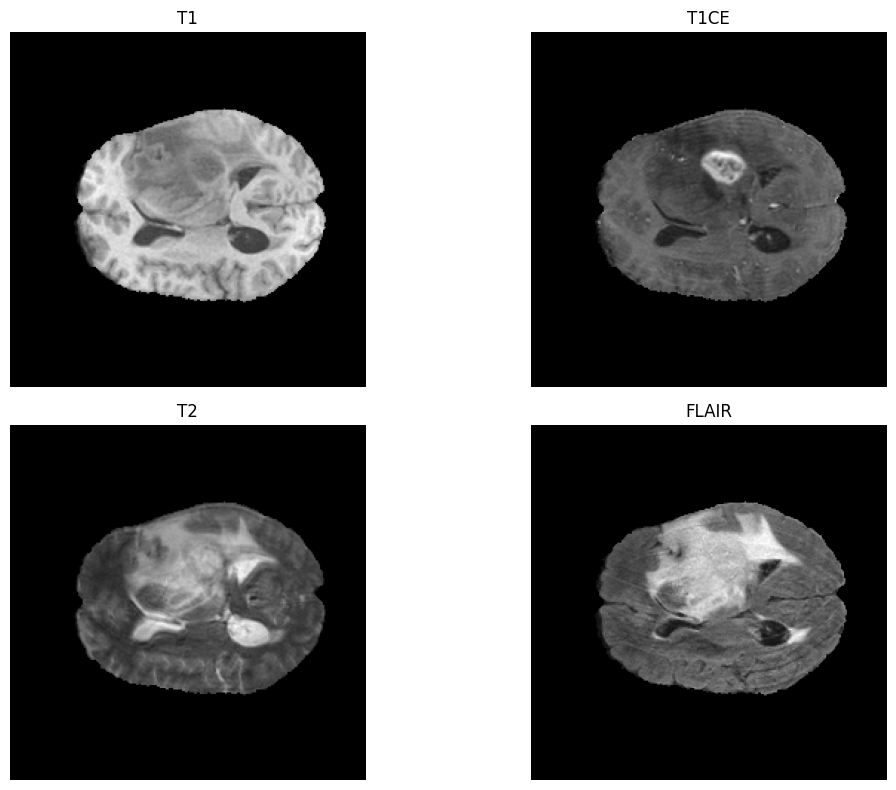

In [ ]:
modalities = ['t1', 't1ce', 't2', 'flair']
volumes = {mod: nib.load(Path(RAW_DIR) / 'BraTS20_Training_001' / f'BraTS20_Training_001_{mod}.nii').get_fdata() for mod in modalities}


def show_slice(volume, slice_idx):
    """Display a single 2D slice from a 3D MRI volume."""
    plt.imshow(volume[:, :, slice_idx], cmap='gray')
    plt.axis('off')

# Pick the same slice index for all (usually middle)
mid_slice = volumes['t1'].shape[2] // 2

# Plot all 4 modalities in one figure
plt.figure(figsize=(12, 8))
for i, mod in enumerate(modalities):
    plt.subplot(2, 2, i + 1)
    show_slice(volumes[mod], mid_slice)
    plt.title(mod.upper())

plt.tight_layout()
plt.show()

# Utility: create a GIF from all slices in an MRI volume
def create_gif_from_volume(volume, output_path, axis=2, fps=10):
    """
    Create a GIF scrolling through the MRI slices.

    Args:
        volume (np.ndarray): 3D MRI data (x, y, z).
        output_path (Path): Path to save the GIF file.
        axis (int): Axis along which to slice (default=2 for axial view).
        fps (int): Frames per second of the GIF.
    """
    # Normalize volume to [0, 255] for visualization
    volume = (255 * (volume - np.min(volume)) / (np.ptp(volume))).astype(np.uint8)
    
    # Rearrange if needed
    if axis == 0:
        slices = [volume[i, :, :] for i in range(volume.shape[0])]
    elif axis == 1:
        slices = [volume[:, i, :] for i in range(volume.shape[1])]
    else:
        slices = [volume[:, :, i] for i in range(volume.shape[2])]
    
    # Save as GIF
    frames = [np.flipud(s) for s in slices]  # Flip vertically for correct orientation
    imageio.mimsave(output_path, frames, fps=fps)
    print(f"✅ GIF saved to {output_path}")
    


# 🧠 MRI Modalities Explained (T1, T1CE, T2, FLAIR)

Magnetic Resonance Imaging (MRI) provides multiple "modalities" or **image contrasts**, each highlighting different tissue properties.  
These variations come from how hydrogen atoms in the body respond to magnetic fields — mainly characterized by **T1** and **T2 relaxation times**.

Different MRI sequences emphasize either T1 or T2 effects, creating unique contrasts that help doctors (and our models!) identify structures and abnormalities in the brain.

---

## 🩺 1. T1 — *Anatomical Structure (Pre-contrast)*

**Full Name:** T1-weighted MRI  
**Purpose:** Provides a clear view of brain anatomy and fat-rich tissues.

| Feature | Appearance |
|----------|-------------|
| **White matter** | Bright |
| **Gray matter** | Gray |
| **CSF (Cerebrospinal Fluid)** | Dark |
| **Tumor/Edema** | Dark |

🧩 **Interpretation:**  
T1 images act as a **baseline** or “map” of normal brain structure. They are used before contrast injection to understand basic anatomy.

🧠 **Clinical use:**  
- Measuring brain volume and structural integrity  
- Detecting cysts or anatomical shifts  
- Serving as reference for other modalities  

---

## 💉 2. T1CE — *Contrast-Enhanced T1 (Post-contrast)*

**Full Name:** T1-weighted with Contrast Enhancement (CE = Contrast Enhanced)  
**Contrast Agent:** Gadolinium (injected intravenously)  

| Feature | Appearance |
|----------|-------------|
| **Enhancing tumor (active regions)** | Bright |
| **Necrotic tissue or CSF** | Dark |
| **White matter** | Bright |
| **Edema** | Dark or gray |

🧩 **Interpretation:**  
The contrast agent leaks through areas where the **blood-brain barrier** is broken — a hallmark of **active tumor growth** or **inflammation**.

🧠 **Clinical use:**  
- Identifying **active or malignant** tumor components  
- Assessing blood-brain barrier disruption  
- Monitoring treatment response  

---

## 💦 3. T2 — *Fluid and Edema Detection*

**Full Name:** T2-weighted MRI  
**Purpose:** Highlights areas with **high water content** (e.g., edema, inflammation, CSF).

| Feature | Appearance |
|----------|-------------|
| **CSF** | Bright |
| **Edema / Inflammation** | Bright |
| **White matter** | Dark |
| **Gray matter** | Light gray |

🧩 **Interpretation:**  
T2 images are very sensitive to **water**, so they make swelling, cysts, or necrotic tissue stand out.

🧠 **Clinical use:**  
- Detecting **edema**, **gliosis**, or **ischemic damage**  
- Differentiating between solid and fluid-filled regions  

---

## 🌫️ 4. FLAIR — *Fluid-Attenuated Inversion Recovery*

**Full Name:** FLAIR (T2-weighted with CSF suppression)  
**Purpose:** Removes CSF brightness to highlight lesions near the ventricles or cortex.

| Feature | Appearance |
|----------|-------------|
| **CSF** | Dark (suppressed) |
| **Edema / Lesions** | Bright |
| **White matter** | Dark |
| **Gray matter** | Gray |

🧩 **Interpretation:**  
Because FLAIR suppresses the bright CSF signal, it’s easier to see subtle **lesions adjacent to ventricles**, such as those caused by tumors or multiple sclerosis.

🧠 **Clinical use:**  
- Detecting **periventricular** and **cortical** lesions  
- Identifying **tumor-related edema**  
- Useful for **stroke** or **MS** diagnosis  

---

## 🧩 Summary Table

| Tissue / Feature | T1 | T1CE | T2 | FLAIR |
|------------------|----|------|----|--------|
| **CSF** | Dark | Dark | Bright | **Dark (suppressed)** |
| **White Matter** | Bright | Bright | Dark | Dark |
| **Gray Matter** | Gray | Gray | Gray | Gray |
| **Edema** | Dark | Dark | Bright | Bright |
| **Enhancing Tumor** | Dark | **Bright** | Bright | Bright |
| **Necrosis** | Dark | Dark | Bright | Bright |

---

## 🧬 In the BraTS Dataset

Each patient in the BraTS dataset includes these four modalities:



These are called **modalities** — they are **different versions of the same brain**, captured with different settings on the MRI machine.  
Each one highlights a different kind of tissue or fluid.  
Think of them like different “filters” on the same photo — one makes edges clearer, one highlights water, one removes background, etc.

---

## 🧩 The Big Picture

| Modality | Think of it as... | What it shows best | What it hides | Use in tumor detection |
|-----------|------------------|--------------------|----------------|-------------------------|
| **T1** | The *plain photo* | General brain structure | Fluids and swelling | Gives the base anatomy |
| **T1CE** | The *photo after adding a tracer that lights up active areas* | Active (growing) tumor parts | Healthy tissue | Shows where the tumor is most active |
| **T2** | The *photo that lights up water* | Fluid, swelling, edema | Fat and white matter | Detects swollen or damaged areas |
| **FLAIR** | The *photo that lights up water but removes the background noise (CSF)* | Lesions near brain ventricles | Normal brain fluid | Highlights hidden edema near fluid-filled areas |

---

## 🩺 Simple Explanation (For Anyone to understand)

Let’s imagine the brain as a **city**:

| Modality | Analogy | What the scan tells us |
|-----------|----------|------------------------|
| **T1** | Daytime satellite image | You see buildings and roads clearly — that’s your baseline structure. |
| **T1CE** | Nighttime image where *active factories glow* | The contrast agent makes “active” or “abnormal” areas light up — usually tumors. |
| **T2** | Image that shows *where it’s raining or wet* | Highlights regions with lots of water — swelling, cysts, or fluid build-up. |
| **FLAIR** | T2 image but *the ocean and lakes are turned off* | Removes normal brain fluid brightness so small hidden problems stand out. |

---

## 💡 Why All Four Matter in ML

Each scan adds a different kind of information.  
When you combine them (stacked as channels), your model can “see”:

- **T1:** normal structure  
- **T1CE:** active tumor  
- **T2:** swelling and fluid  
- **FLAIR:** hidden edema near fluid regions  

In code terms:

```python
# Imagine you have these 3D volumes (H, W, D)
t1 = load_nii("t1.nii")
t1ce = load_nii("t1ce.nii")
t2 = load_nii("t2.nii")
flair = load_nii("flair.nii")

# Stack them like RGB channels
input_volume = np.stack([t1, t1ce, t2, flair], axis=-1)
print(input_volume.shape)  # (H, W, D, 4)


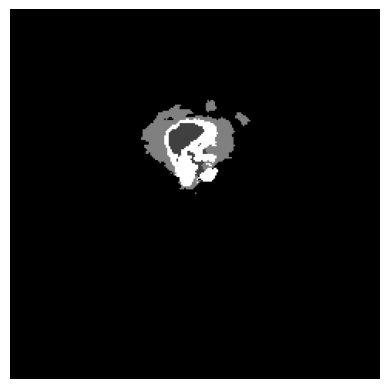

In [26]:
show_slice(nib.load(Path(RAW_DIR) / "BraTS20_Training_001" / "BraTS20_Training_001_seg.nii").get_fdata(), 50)

subject_dir = Path(RAW_DIR)/ "BraTS20_Training_001"
flair_path = subject_dir / "BraTS20_Training_001_flair.nii"

if not flair_path.exists():
    raise FileNotFoundError(f"❌ File not found: {flair_path}")

# Load MRI volume
img = nib.load(flair_path)
volume = img.get_fdata()
output_gif = "../visualization/flair_animation.gif"
# create_gif_from_volume(volume, output_gif, axis=2, fps=8)
# Image(filename=output_gif)